In [12]:
import pandas as pd
import requests
import seaborn as sns
import matplotlib.pyplot as plt
from io import StringIO

Extraction of desired data from the github data set about Covid 19 in New Zealand. I chose New Zealand because their government navigated the Covid crisis differently than other countries. 

In [23]:
# Getting data from the URL
#hi!
#hi
url = "https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv"

response = requests.get(url)

if response.status_code == 200:
    
    data = pd.read_csv(StringIO(response.text))
    
    nz_data = data[data['location'] == 'New Zealand'][['date', 'new_cases','new_deaths','total_cases','total_deaths']]
    
    nz_data['new_cases'].dropna(inplace=True)
    nz_data['new_deaths'].dropna(inplace=True)
    nz_data['total_deaths'].dropna(inplace=True)
    nz_data['total_cases'].dropna(inplace=True)
    

    print (nz_data)
    
    nz_data['date'] = pd.to_datetime(nz_data['date'])
    
else:
    print(f"Failed to retrieve data. Status code: {response.status_code}")



              date  new_cases  new_deaths  total_cases  total_deaths
220202  2020-01-03        0.0         0.0          NaN           NaN
220203  2020-01-04        0.0         0.0          NaN           NaN
220204  2020-01-05        0.0         0.0          NaN           NaN
220205  2020-01-06        0.0         0.0          NaN           NaN
220206  2020-01-07        0.0         0.0          NaN           NaN
...            ...        ...         ...          ...           ...
221604  2023-11-05        0.0         0.0    2400967.0        3445.0
221605  2023-11-06        0.0         0.0    2400967.0        3445.0
221606  2023-11-07        0.0         0.0    2400967.0        3445.0
221607  2023-11-08        0.0         0.0    2400967.0        3445.0
221608  2023-11-09        0.0         0.0    2400967.0        3445.0

[1407 rows x 5 columns]


1. This lineplot shows the daily cases and deaths caused by Covid in New Zealand. This kind of plot shows us that although daily cases shot up from 2022 till now, the daily deathtoll is consistently low (almost zero) in New Zealand.

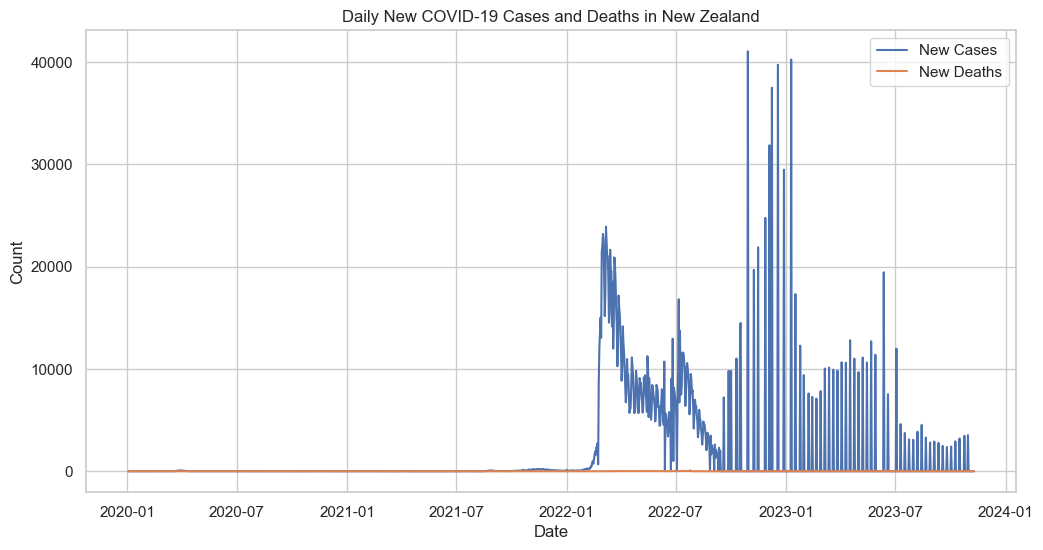

In [24]:

plt.figure(figsize=(12, 6))
sns.lineplot(x='date', y='new_cases', data=nz_data, label='New Cases')
sns.lineplot(x='date', y='new_deaths', data=nz_data, label='New Deaths')
plt.title('Daily New COVID-19 Cases and Deaths in New Zealand')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()
plt.show()

This lineplot shows the total cases and total deaths in New Zealand caused by Covid. This plot shows the significant difference between the high total number of cases and the close-to-zero total number of deaths in the country.

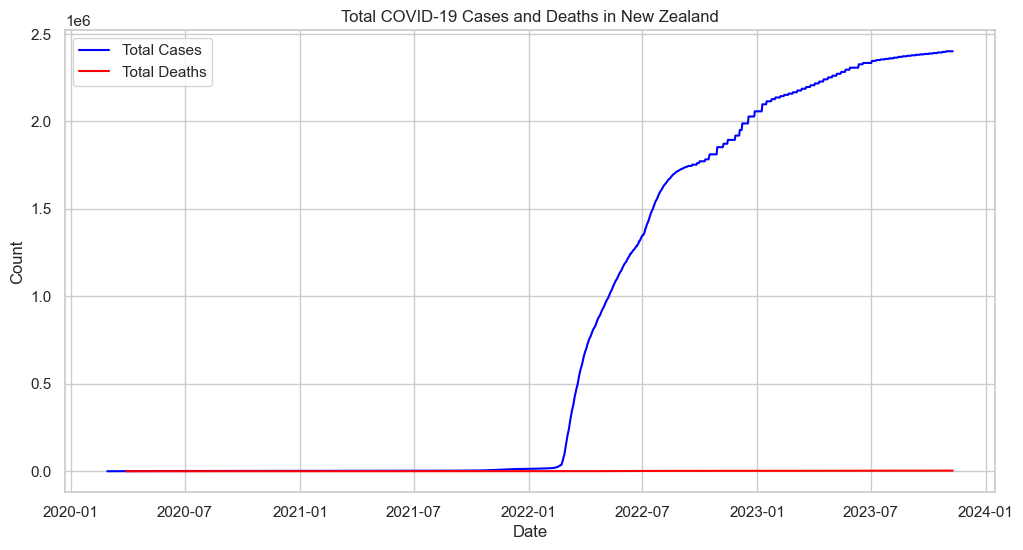

In [28]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='date', y='total_cases', data=nz_data, label='Total Cases', color='blue')
sns.lineplot(x='date', y='total_deaths', data=nz_data, label='Total Deaths', color='red')
plt.title('Total COVID-19 Cases and Deaths in New Zealand')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()
plt.show()

This box plot tell us the distribution of daily new cases of covid in New Zealand. It tells us that the majority of new cases reported each day were close to zero nd that new cases never exceeded more than 100 in a day.

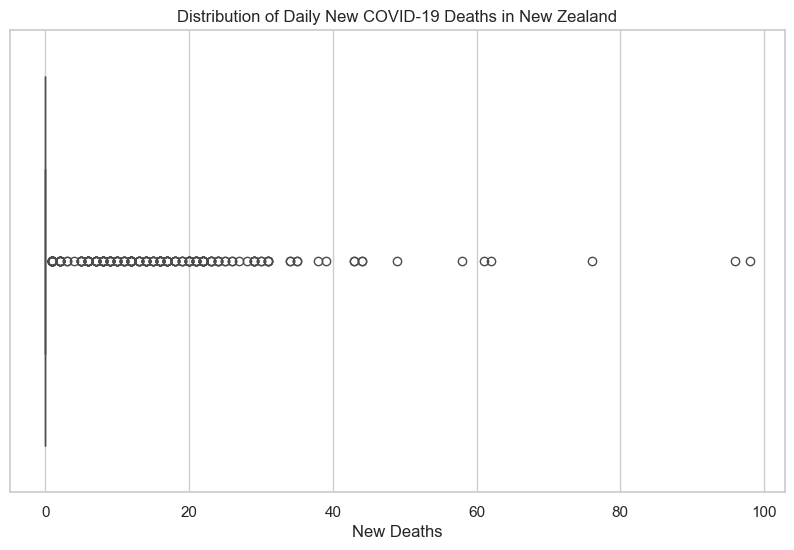

In [30]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='new_deaths', data=nz_data)
plt.title('Distribution of Daily New COVID-19 Deaths in New Zealand')
plt.xlabel('New Deaths')
plt.show()

This scatter plot shows us the relation between the total cases and the total deaths in New Zealand. We can see that an increase in cases resulted in an increase in deaths although the curve is gentle due to the x axix being in log form.

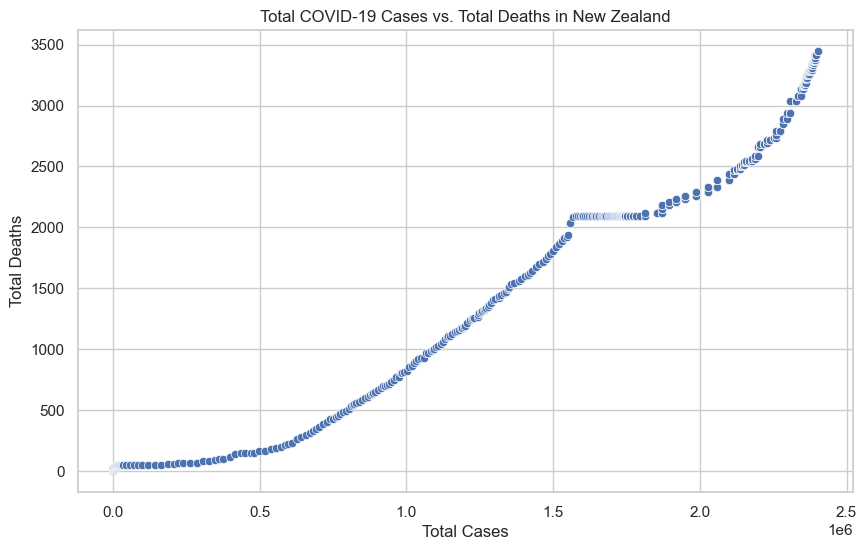

In [31]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='total_cases', y='total_deaths', data=nz_data)
plt.title('Total COVID-19 Cases vs. Total Deaths in New Zealand')
plt.xlabel('Total Cases')
plt.ylabel('Total Deaths')
plt.show()

Another way to view the distribution of daily new covid cases in New Zealand is through a histogram where we can see that the daily reporting of new cases was majorly close to zero.

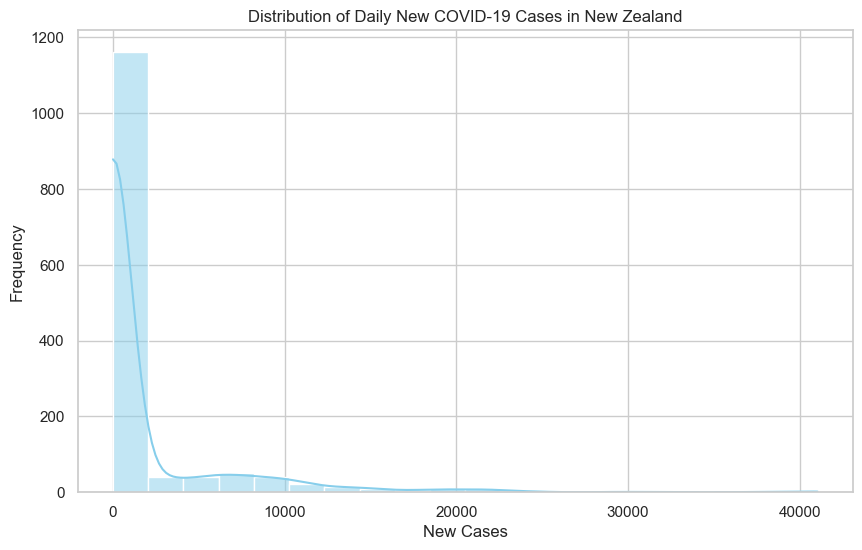

In [33]:
plt.figure(figsize=(10, 6))
sns.histplot(nz_data['new_cases'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Daily New COVID-19 Cases in New Zealand')
plt.xlabel('New Cases')
plt.ylabel('Frequency')
plt.show()

For further work, I would like to compare New Zealand's data with a country that was gravely affected by the covid crisis.